In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from tqdm import tqdm
import numpy as np

🩸 Cancer Detected: High Biomarker Activity!


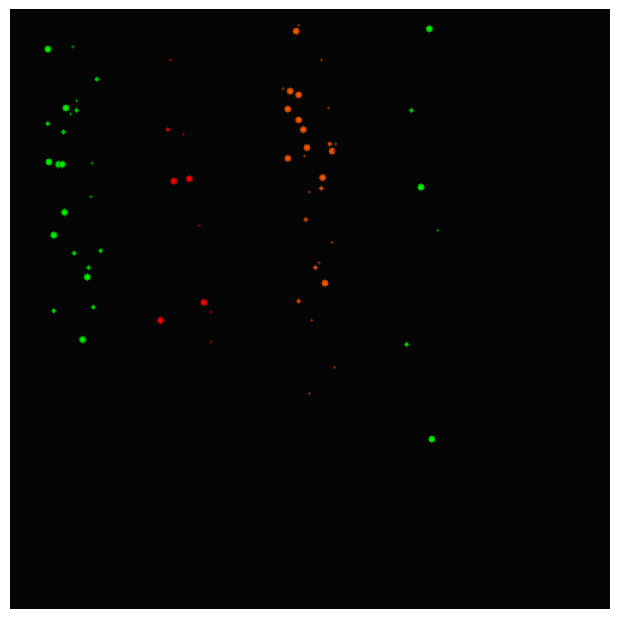

In [3]:
size = 500
strip_width = size // 5

colors = {
    'Ca125': (0, 255, 0),     # Green (520 nm)
    'forl1': (0, 0, 255),     # Red (650 nm)
    'He4': (0, 90, 255),     # Orange red (578 nm)
    'Epcam': (0, 255, 0),     # Green (520 nm)
    'Mirna': (0, 0, 139)      # Deep Red (670 nm)
}

# blank image
image = np.zeros((size, size, 3), dtype=np.uint8)

# Add noise to circle edges and blur it
def add_noise(image, center, radius, color):
    temp = np.zeros_like(image)
    
    cv2.circle(temp, center, radius, color, -1)

    noise_intensity = int(radius * 0.5)  
    for _ in range(noise_intensity * 10):
        x = random.randint(center[0] - radius, center[0] + radius)
        y = random.randint(center[1] - radius, center[1] + radius)
        if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
            jitter = random.randint(-30, 30)
            noisy_color = tuple(np.clip(np.array(color) + jitter, 0, 255))
            temp[y, x] = noisy_color
    
    # blurring
    blurred = cv2.GaussianBlur(temp, (5, 5), 1)
    mask = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    image[mask > 0] = blurred[mask > 0]

# generate a biased y-coordinate (higher probability at the top)
def biased_y_coordinate(size):
    return int(size * (np.random.beta(2, 5)))

# drawing blobs
def draw_blobs(image, x_start, color, num_blobs):
    center_x = x_start + strip_width // 2
    spread = strip_width // 4
    
    for _ in range(num_blobs):
        radius = random.randint(1, 3)
        y = biased_y_coordinate(size)
        x = random.randint(max(0, center_x - spread), min(size - 1, center_x + spread))
        add_noise(image, (x, y), radius, color)

positive = random.random() < 0.3
if positive:
    print("🩸 Cancer Detected: High Biomarker Activity!")
else:
    print("✅ No Cancer Detected: Low Biomarker Activity.")

for i, (marker, color) in enumerate(colors.items()):
    x_start = i * strip_width
    
    image[:, x_start:x_start + strip_width] = (5, 5, 5)
    
    if positive:
        # If cancer (stage 1 - 2)
        if marker == 'Ca125':
            num_blobs = random.randint(15, 30)  # High activity
        elif marker == 'forl1':
            num_blobs = random.randint(4, 10)  # Low but not absent
        elif marker == 'He4':
            num_blobs = random.randint(15, 30)  # High activity
        elif marker == 'Epcam':
            num_blobs = random.randint(5, 10)  # Moderate low
        elif marker == 'Mirna':
            num_blobs = random.randint(0, 7)  # Moderate but higher than forl1 and epcam
    else:
        # If no cancer
        if marker == 'Ca125':
            num_blobs = random.randint(7, 14)  # Present but sparse
        elif marker == 'forl1':
            num_blobs = random.randint(0, 3)  # Very low or absent
        elif marker == 'He4':
            num_blobs = random.randint(5, 10)  # Present but sparse   # for pre : 8-15, for post : 5-10
        elif marker == 'Epcam':
            num_blobs = random.randint(0, 3)  # Very low or absent
        elif marker == 'Mirna':
            num_blobs = random.randint(0, 1)  # Almost completely absent
    
    draw_blobs(image, x_start, color, num_blobs)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')

plt.tight_layout(pad=0)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('image.png', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()


In [101]:
# Dataset Config
OUTPUT_DIR = 'dataset'
NUM_SAMPLES = 5000
SIZE = 500
STRIP_WIDTH = SIZE // 5

COLORS = {
    'Ca125': (0, 255, 0),     # Green (520 nm)
    'forl1': (0, 0, 255),     # Red (650 nm)
    'He4': (0, 90, 255),     # Orange red (578 nm)
    'Epcam': (0, 255, 0),     # Green (520 nm)
    'Mirna': (0, 0, 139)      # Deep Red (670 nm)
}

# Add noise and blur to circle edges
def add_noise(image, center, radius, color):
    temp = np.zeros_like(image)
    cv2.circle(temp, center, radius, color, -1)
    noise_intensity = int(radius * 0.5)
    for _ in range(noise_intensity * 10):
        x = random.randint(center[0] - radius, center[0] + radius)
        y = random.randint(center[1] - radius, center[1] + radius)
        if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
            jitter = random.randint(-30, 30)
            noisy_color = tuple(np.clip(np.array(color) + jitter, 0, 255))
            temp[y, x] = noisy_color
    blurred = cv2.GaussianBlur(temp, (5, 5), 1)
    mask = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    image[mask > 0] = blurred[mask > 0]

def biased_y_coordinate(size):
    return int(size * (np.random.beta(2, 5)))

def draw_blobs(image, x_start, color, num_blobs):
    center_x = x_start + STRIP_WIDTH // 2
    spread = STRIP_WIDTH // 4
    for _ in range(num_blobs):
        radius = random.randint(1, 3)
        y = biased_y_coordinate(SIZE)
        x = random.randint(max(0, center_x - spread), min(SIZE - 1, center_x + spread))
        add_noise(image, (x, y), radius, color)

def generate_sample(index, positive):
    image = np.zeros((SIZE, SIZE, 3), dtype=np.uint8)
    
    for i, (marker, color) in enumerate(COLORS.items()):
        x_start = i * STRIP_WIDTH
        image[:, x_start:x_start + STRIP_WIDTH] = (5, 5, 5)
        
        if positive:
            num_blobs = {
                'Ca125': random.randint(15, 30),
                'forl1': random.randint(4, 9),
                'He4': random.randint(15, 30),
                'Epcam': random.randint(5, 10),
                'Mirna': random.randint(0, 7)
            }[marker]
        else:
            num_blobs = {
                'Ca125': random.randint(5, 10),
                'forl1': random.randint(0, 3),
                'He4': random.randint(5, 10),
                'Epcam': random.randint(0, 3),
                'Mirna': random.randint(0, 1)
            }[marker]

        draw_blobs(image, x_start, color, num_blobs)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    label = 'positive' if positive else 'negative'
    output_path = os.path.join(OUTPUT_DIR, label)
    os.makedirs(output_path, exist_ok=True)
    
    filename = f"sample_{index}.png"
    cv2.imwrite(os.path.join(output_path, filename), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    
    return label

# Generate the dataset
def generate_dataset():
    labels = []
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    for i in tqdm(range(NUM_SAMPLES)):
        positive = random.random() < 0.3
        label = generate_sample(i, positive)
        labels.append([f'sample_{i}.png', 1 if label == 'positive' else 0])
    
    np.savetxt(os.path.join(OUTPUT_DIR, 'labels.csv'),
               labels,
               delimiter=',',
               fmt='%s',
               header='filename,label',
               comments='')

    print(f"Dataset generated in '/{OUTPUT_DIR}'")


generate_dataset()


100%|██████████| 5000/5000 [03:47<00:00, 22.01it/s]

Dataset generated in '/dataset'
